In [1]:
# Mohit Jain 
# Date - 26 June, 2020

<h1> Module 6 : </h1>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd
import re
import warnings
import sklearn.cluster
warnings.filterwarnings("ignore")


<h3> Question 1 : </h3>

In [3]:
filenames = glob.glob('Module6/*.csv')
def getName( filename ):
    return re.sub(r'^.+/|\.[^.]+$',     '',    filename)
file=[]
for f in filenames:
    file.append(getName(f))
final_list=[]
for f in file:
    f=f.lstrip('Module 6\\')
    final_list.append(f)
    
len(final_list)


30

In [4]:
def read_csv( filename ):
    if isinstance(filename, pd.DataFrame): return filename  # OPTIMIZATION: allow passthrough of existing dataframe

    dataframe = pd.read_csv( filename, parse_dates=['Date'] )
    dataframe.set_index( 'Date', inplace=True )
    return dataframe


In [5]:
filenames = glob.glob('Module6/*.csv')
portfolio_df=pd.DataFrame()
portfolio_df.reset_index()
def define_df(file_list,filenames):
    i=0
    for file in file_list:
        portfolio_df[file]=pd.read_csv(filenames[i])['Close Price']
        data=pd.read_csv(filenames[i],parse_dates=['Date'])
        i=i+1
    return portfolio_df
portfolio_df=define_df(final_list,filenames)  
portfolio_df

,ADANIPORTS,ADANIPOWER,APOLLOTYRE,ASHOKA,AXISBANK,BERGEPAINT,BOMDYEING,CENTURYPLY,CIPLA,FORTIS,...,INDTREE,PNB,PVR,RAYMOND,RELIANCE,SUNPHARMA,TATAPOWER,TCS,TITAN,VOLTAS
0,356.20,30.25,231.90,216.05,500.10,259.5,82.20,266.65,569.00,205.25,...,509.45,166.80,1524.95,772.80,1344.10,654.45,83.55,2365.10,483.65,431.85
1,354.50,32.85,234.40,214.90,501.50,261.5,83.40,266.10,565.60,207.90,...,511.30,174.15,1539.00,785.00,1356.30,652.35,83.85,2429.15,488.30,432.45
2,348.55,33.10,237.35,217.00,502.80,260.9,82.25,264.85,562.35,205.90,...,506.35,165.05,1530.30,783.65,1353.10,650.90,85.35,2455.35,481.75,430.20
3,347.90,31.90,232.65,209.65,492.00,254.1,78.95,260.35,560.10,196.85,...,492.90,158.50,1515.05,746.95,1327.35,653.95,83.75,2536.20,471.65,414.10
4,349.45,32.40,234.65,206.25,501.70,247.8,77.15,254.05,564.95,203.55,...,497.50,155.20,1513.55,723.10,1318.85,653.15,84.15,2507.15,471.15,415.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,371.90,41.35,191.75,115.45,741.85,303.7,119.35,161.30,563.35,135.20,...,980.50,83.95,1780.10,807.10,1343.50,448.20,64.35,2215.40,1082.85,576.65
491,369.80,40.95,185.30,115.30,735.50,302.3,117.75,160.50,557.95,133.60,...,980.45,84.25,1748.50,805.30,1299.45,439.15,64.50,2132.00,1086.50,574.10
492,363.90,41.45,190.95,117.45,731.00,301.6,117.05,160.50,558.00,133.00,...,975.35,86.25,1758.45,804.40,1256.45,439.35,64.40,2157.85,1088.70,580.05
493,372.55,38.45,186.20,117.15,735.05,299.5,109.85,162.85,557.75,131.90,...,979.10,79.80,1715.40,779.35,1251.15,437.75,63.80,2151.95,1104.45,572.20


<h3> Question 2 : </h3>

In [6]:
def normalize_weights( weights ):
    for i in range(0,3):
        weights  = np.round( weights, 3 ) 
        weights /= weights.sum()
    return np.asarray(weights)
    
def random_weights():
    weights  = np.random.rand(portfolio_df.shape[1])
    return normalize_weights( weights )

weights = random_weights()
weights

array([0.03293413, 0.03792415, 0.00598802, 0.05988024, 0.04191617,
       0.01796407, 0.02994012, 0.0508982 , 0.03792415, 0.03193613,
       0.02994012, 0.03792415, 0.02994012, 0.00499002, 0.0489022 ,
       0.01996008, 0.01996008, 0.05688623, 0.03393214, 0.00898204,
       0.01497006, 0.02894212, 0.04590818, 0.00399202, 0.07684631,
       0.05489022, 0.01696607, 0.02095808, 0.06387226, 0.03393214])

In [7]:
working_days_per_year    = 252
portfolio_summary = pd.DataFrame()
portfolio_summary['Returns']    = portfolio_df.pct_change().mean() * working_days_per_year
portfolio_summary['Volatility'] = portfolio_df.pct_change().std()  * np.sqrt( working_days_per_year )
final_portfolio = portfolio_summary
portfolio_summary

,Returns,Volatility
ADANIPORTS,0.060376,0.309436
ADANIPOWER,0.304655,0.609913
APOLLOTYRE,-0.064172,0.310130
ASHOKA,-0.208086,0.442525
AXISBANK,0.232722,0.277636
BERGEPAINT,0.108714,0.267396
BOMDYEING,0.326958,0.602258
CENTURYPLY,-0.181969,0.374888
CIPLA,0.019919,0.253941
FORTIS,-0.145528,0.421213


<h3> Question 3 : </h3>

<function matplotlib.pyplot.show(*args, **kw)>

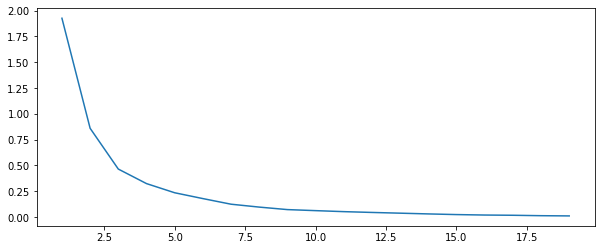

In [8]:
from sklearn.cluster import KMeans
kn = range(1,20)
li = []
for i in kn:
    m = KMeans(n_clusters = i)
    m.fit_predict(portfolio_summary[["Returns", "Volatility"]])
    a = m.inertia_
    li.append(a)

plt.figure(figsize = (10,4))
plt.plot(kn,li)
plt.show

<h4>By looking at the Elbow Curve, we are taking two values of k = 3 and 7</h4>

In [9]:
from matplotlib import cm

cmap = cm.get_cmap('Set1') # Colour map (there are many others)
def get_color(n, max=6):
    if isinstance(n, list): 
        return [ get_color(i, max) for i in n ]
    else:
        return cmap(0. + n/max)

In [10]:
portfolio_kmeans ={}

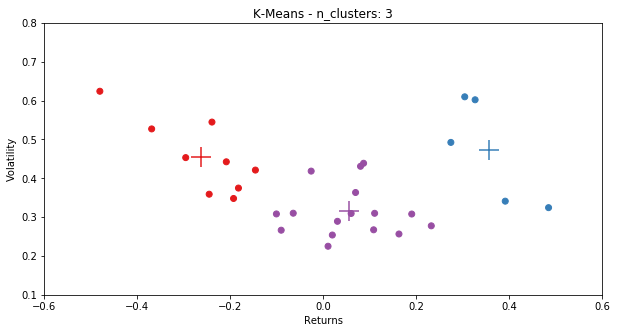

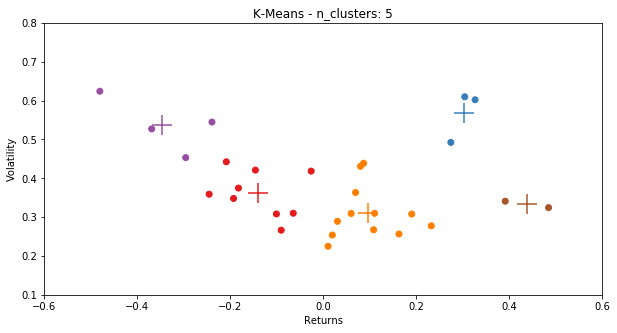

In [11]:
for i in [3,5]:
    plt.figure(figsize = (10,5))
    portfolio_kmeans[i]      = KMeans(n_clusters=i, random_state=0).fit(portfolio_summary)
    portfolio_kmeans_predict = portfolio_kmeans[i].predict(portfolio_summary)

    plt.scatter(portfolio_summary.Returns, portfolio_summary.Volatility, c=get_color(portfolio_kmeans_predict))
    plt.ylim(0.1, 0.8)
    plt.xlim(-0.60, 0.60)
    plt.title('K-Means - n_clusters: ' + str(i))
    plt.xlabel('Returns')
    plt.ylabel('Volatility')
    # Mark Cluster Centers
    for i, coords in enumerate( portfolio_kmeans[i].cluster_centers_ ):
        plt.scatter( coords[0], coords[1], s=400, marker='+', c=[ get_color(i) ] )
    plt.show()

<h2> Final Plot : </h2>

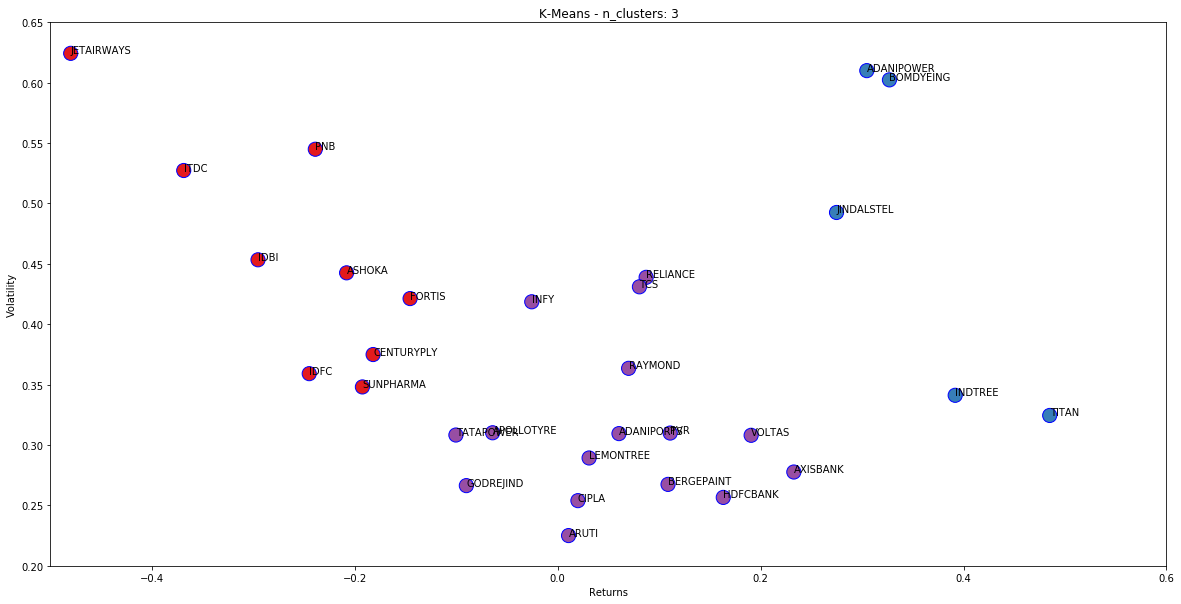

In [12]:
plt.figure(figsize = (20,10))
portfolio_kmeans[8]      = KMeans(n_clusters=3, random_state=0).fit(portfolio_summary)
portfolio_kmeans_predict = portfolio_kmeans[8].predict(portfolio_summary)

plt.scatter(portfolio_summary.Returns, portfolio_summary.Volatility, s = 200, edgecolors='b',
            c=get_color(portfolio_kmeans_predict))
plt.ylim(0.2, 0.65)
plt.xlim(-0.50, 0.60)
plt.title('K-Means - n_clusters: ' + str(3))
plt.xlabel('Returns')
plt.ylabel('Volatility')
y = list(portfolio_summary["Returns"])
z = list(portfolio_summary["Volatility"])
for i, txt in enumerate(final_list):
    plt.annotate(txt, (y[i],z[i]))
plt.show()

In [13]:
for i in [3,5]:
    final_portfolio['cluster_'+str(i)] = portfolio_kmeans[i].predict( portfolio_summary[['Returns', 'Volatility']] )
# FINAL DATAFRAME - 
final_portfolio

,Returns,Volatility,cluster_3,cluster_5
ADANIPORTS,0.060376,0.309436,2,3
ADANIPOWER,0.304655,0.609913,1,1
APOLLOTYRE,-0.064172,0.310130,2,0
ASHOKA,-0.208086,0.442525,0,0
AXISBANK,0.232722,0.277636,2,3
BERGEPAINT,0.108714,0.267396,2,3
BOMDYEING,0.326958,0.602258,1,1
CENTURYPLY,-0.181969,0.374888,0,0
CIPLA,0.019919,0.253941,2,3
FORTIS,-0.145528,0.421213,0,0


<h1> MODULE 6 ENDS here, Thank You </h1>